<a href="https://colab.research.google.com/github/DJS-INFOMATRIX/Computational-Finance/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Decision  Trees In Machine Learning**

**Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems.** <br><br>
In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.<br><br>In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.


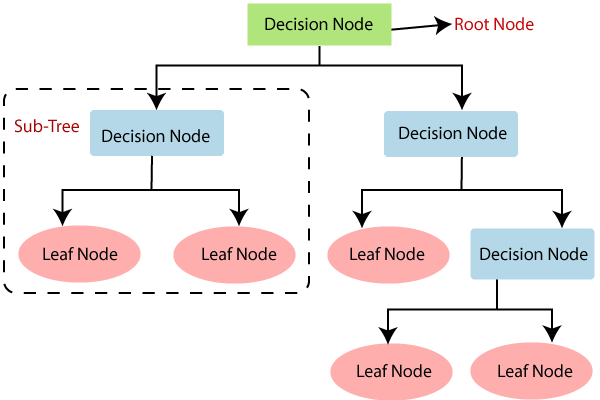

Step-1: Begin the tree with the root node, says S, which contains the complete dataset.<br><br>
Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).<br><br>
Step-3: Divide the S into subsets that contains possible values for the best attributes.<br><br>
Step-4: Generate the decision tree node, which contains the best attribute.<br><br>
Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

Example: Suppose there is a candidate who has a job offer and wants to decide whether he should accept the offer or Not. So, to solve this problem, the decision tree starts with the root node (Salary attribute by ASM). The root node splits further into the next decision node (distance from the office) and one leaf node based on the corresponding labels. The next decision node further gets split into one decision node (Cab facility) and one leaf node. Finally, the decision node splits into two leaf nodes (Accepted offers and Declined offer).

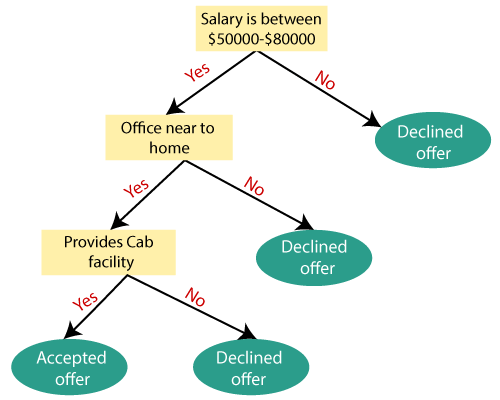

**Steps to be followed:**<br><br>
1) Data Pre-processing step <br>
2) Fitting a Decision-Tree algorithm to the Training set<br>
3) Predicting the test result<br>
4) Test accuracy of the result(Creation of Confusion matrix)<br>
5) Visualizing the test set result.<br>





In [ ]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

# importing datasets
data_set= pd.read_csv('User_Data.csv')
data_set.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


**Independent Variables (Features)**<br>
**Definition:**<br> Independent variables are the inputs or predictors that you use to make predictions. They are also known as explanatory variables.<br>
**Identification:**<br>
These are typically the variables you control or the factors you think might influence the outcome.<br>
In a dataset, they are usually not the primary outcome of interest but are used to understand the patterns or factors affecting the dependent variable.

**Dependent Variable (Target)** <br>
**Definition:**<br> The dependent variable is the outcome or the variable you are trying to predict. It is also known as the response or outcome variable.
**Identification:**<br>
This is usually the main focus of your analysis or the primary outcome you want to understand or predict.<br>
It is the variable that is affected by the independent variables.

In [ ]:
# extracting Independent and dependent Variable
# Age and EstimatedSalary: These are the features you believe might influence the purchase decision.
# Purchased: This is the outcome you want to predict.
# iloc: This is a method in pandas used for integer-location based indexing, allowing you to select data by row and column positions.


x= data_set.iloc[:, [2,3]].values
"""
[:, [2, 3]]: The ':' before the comma means we are selecting all rows.
The [2, 3] after the comma means we are selecting the columns at index positions 2 and 3.

In Python, indexing starts at 0, so this is selecting the 3rd and 4th columns of the DataFrame.

.values: This converts the selected data into a NumPy array.

Hence, values from all rows of columns 2 and 3 (which are the 3rd and 4th columns if you count from 0) and stores them in the variable x.
These columns are considered the features or predictors that you will use to predict the dependent variable.
"""



y= data_set.iloc[:, 4].values
"""
extracts the values from all rows of column 4 (which is the 5th column if you count from 0) and stores them in the variable y.
This column is considered the target or outcome that you want to predict.
"""

'\nextracts the values from all rows of column 4 (which is the 5th column if you count from 0) and stores them in the variable y.\nThis column is considered the target or outcome that you want to predict.\n'

In [ ]:
print(x)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [ ]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split

# This function is used to split arrays or matrices into random train and test subsets.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

"""
test_size=0.25: This parameter specifies the proportion of the dataset to include in the test split.
In this case, 25% of the data will be used for testing, and 75% will be used for training.

Setting random_state=0 ensures that the way the data is split into training and test sets is the same every time you run the code.
This makes your results reproducible and ensures that others (or you in the future) can get the same split
and therefore the same results when they run the code.
"""


'\ntest_size=0.25: This parameter specifies the proportion of the dataset to include in the test split.\nIn this case, 25% of the data will be used for testing, and 75% will be used for training.\n\nrandom_state=0 ensures reproducibility of the split.\n'

In [ ]:
#feature Scaling
"""
Feature scaling is the process of normalizing the range of independent variables or features of data.
It's used when we want to bring all features to a similar scale so that each feature contributes
approximately proportionately to the final prediction.
"""
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()

x_train= st_x.fit_transform(x_train)
"""
The fit_transform method combines fitting (computing the mean and variance of the features)
and transforming (scaling the features) in one step.
"""

x_test= st_x.transform(x_test)
"""
This transforms the test data using the same scaling as the training data. We use transform instead
of fit_transform to ensure we're using the same scaling parameters as the training data.
transform(): This method only applies the transformation using pre-calculated mean and standard deviation
"""

"\nThis transforms the test data using the same scaling as the training data. We use transform instead\nof fit_transform to ensure we're using the same scaling parameters as the training data.\ntransform(): This method only applies the transformation using pre-calculated mean and standard deviation\n"

In [ ]:
#Fitting Decision Tree classifier to the training set

from sklearn.tree import DecisionTreeClassifier

classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
"""
Entropy: Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as,
Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no)

Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature)
"""

classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test, y_pred)

print(cm)

# Calculating and printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

[[62  6]
 [ 3 29]]

Accuracy: 0.91


True Positives (TP): 29<br>
True Negatives (TN): 62<br>
False Positives (FP): 6<br>
False Negatives (FN): 3<br><br>

<ipython-input-14-58e1809f915a>:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


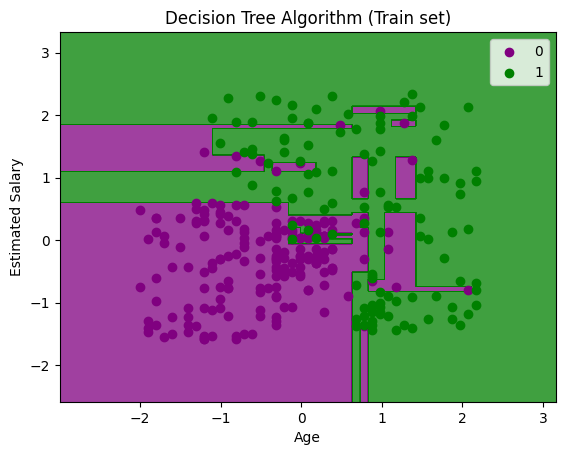

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(x_set[:, 0].min() - 1, x_set[:, 0].max() + 1, 0.01),
                     np.arange(x_set[:, 1].min() - 1, x_set[:, 1].max() + 1, 0.01))
"""
np.meshgrid is used to create a grid of points covering the
entire feature space (all combinations of x and y values within a specified range).

np.arange(start, stop, step) creates an array of values from start to stop (exclusive) with a step size of 0.01.

x_set[:, 0].min() - 1: Finds the minimum value of the first feature (column 0 of x_set) and subtracts 1. This sets the starting point of the range.
x_set[:, 0].max() + 1: Finds the maximum value of the first feature and adds 1. This sets the end point of the range.
0.01: Specifies the step size between each point in the range. Smaller steps create a denser grid.

x1 and x2 are matrices containing the x and y coordinates of the grid points.
"""

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))

"""
classifier.predict(np.array([x1.ravel(), x2.ravel()]).T): This part predicts the class labels for each point in the grid (x1, x2)
using the classifier model's predict method.
The ravel() function in NumPy is used to flatten multi-dimensional arrays into a one-dimensional array.
"""

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

"""
Setting Limits: plt.xlim() is used to specify the lower and upper bounds of the x-axis.
Usage: It takes two arguments: the minimum (xmin) and maximum (xmax) values for the x-axis.
Effect: After calling plt.xlim(xmin, xmax), the plot will display data only within the specified range on the x-axis.
"""

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('purple', 'green'))(i), label=j)

"""
This loop iterates over the unique values in y_set (which are typically the class labels).
enumerate() provides both the index i and the value j for each iteration.

plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], ...)
This creates a scatter plot for each class.



(i) selects the color based on the index of the class (0 for purple, 1 for green).
"""


plt.title('Decision Tree Algorithm (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-24-efcb113e0e9f>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


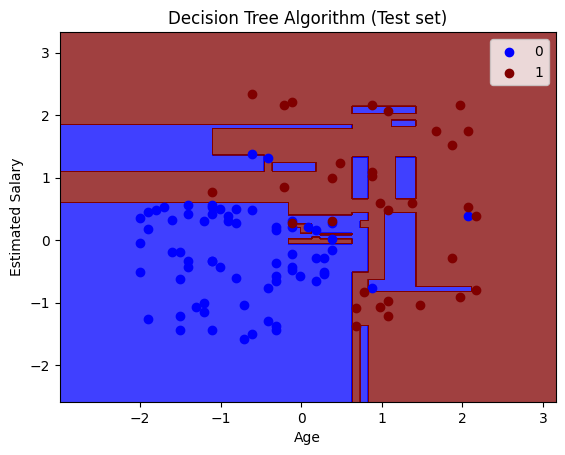

In [ ]:
# Visualizing the test set result
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('blue', 'maroon')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())


for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('blue', 'maroon'))(i), label=j)

plt.title('Decision Tree Algorithm (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


**Advantages of the Decision Tree** <br><br>
It is simple to understand as it follows the same process which a human follow while making any decision in real-life.<br>
It can be very useful for solving decision-related problems.<br>
It helps to think about all the possible outcomes for a problem. <br>
There is less requirement of data cleaning compared to other algorithms.

**Disadvantages of the Decision Tree** <br><br>
The decision tree contains lots of layers, which makes it complex.<br>
It may have an overfitting issue, which can be resolved using the Random Forest algorithm.<br>
For more class labels, the computational complexity of the decision tree may increase.